# mounting google drive and reading data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# analysing the data

In [4]:
data=pd.read_csv("/content/gdrive/MyDrive/weathera-pred/weather_data.csv")

In [5]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [6]:
data.shape

(366, 22)

In [7]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [9]:
data.columns=data.columns.str.lower()

# analysing missing values

In [10]:
data.isnull().sum()

mintemp           0
maxtemp           0
rainfall          0
evaporation       0
sunshine          3
windgustdir       3
windgustspeed     2
winddir9am       31
winddir3pm        1
windspeed9am      7
windspeed3pm      0
humidity9am       0
humidity3pm       0
pressure9am       0
pressure3pm       0
cloud9am          0
cloud3pm          0
temp9am           0
temp3pm           0
raintoday         0
risk_mm           0
raintomorrow      0
dtype: int64

In [11]:
numeric_cols = data.select_dtypes(include='number')
print(numeric_cols)


     mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     windspeed9am  windspeed3pm  humidity9am  humidity3pm  pressure9am  \
0             6.0            20           68     

In [12]:
cate_cols = data.select_dtypes(include='object')
print(cate_cols)


    windgustdir winddir9am winddir3pm raintoday raintomorrow
0            NW         SW         NW        No          Yes
1           ENE          E          W       Yes          Yes
2            NW          N        NNE       Yes          Yes
3            NW        WNW          W       Yes          Yes
4           SSE        SSE        ESE       Yes           No
..          ...        ...        ...       ...          ...
361         NNW        SSE         NW        No           No
362           N        NNW        NNW        No           No
363         ESE        ENE        ENE        No           No
364          NW        SSW        WNW        No           No
365          NW         NW        WNW        No           No

[366 rows x 5 columns]


analysing numeric columns

In [13]:
numeric_cols.duplicated().sum()

0

In [14]:
numeric_cols.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,risk_mm
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [15]:
null_values=data[data['sunshine'].isnull()].index.tolist()

In [16]:
for x in null_values:
  print(data.loc[x,:])


mintemp             7.4
maxtemp            16.3
rainfall            0.0
evaporation         1.2
sunshine            NaN
windgustdir         NNE
windgustspeed      30.0
winddir9am          SSE
winddir3pm           NE
windspeed9am        6.0
windspeed3pm         19
humidity9am          75
humidity3pm          65
pressure9am      1031.4
pressure3pm      1027.9
cloud9am              7
cloud3pm              7
temp9am            12.1
temp3pm            14.5
raintoday            No
risk_mm             6.2
raintomorrow        Yes
Name: 221, dtype: object
mintemp            -3.3
maxtemp            15.1
rainfall            0.0
evaporation         3.0
sunshine            NaN
windgustdir         SSW
windgustspeed      30.0
winddir9am          SSE
winddir3pm           SE
windspeed9am        9.0
windspeed3pm         13
humidity9am          57
humidity3pm          23
pressure9am      1027.7
pressure3pm      1025.5
cloud9am              1
cloud3pm              1
temp9am             7.9
temp3pm        

In [17]:
cate_cols['winddir9am'].value_counts()

winddir9am
SE     47
SSE    40
NNW    36
N      31
NW     30
ESE    29
S      27
E      22
SSW    17
WNW    16
NNE     8
ENE     8
W       8
SW      7
WSW     5
NE      4
Name: count, dtype: int64

In [18]:
dummy=data[data['winddir9am'].isnull()].index.tolist()

In [19]:
count=0
for x in dummy:
  if (data.loc[x,'windgustspeed']>30):
    count=count+1

print(count)

20


In [20]:
comp=data.loc[:,('windgustspeed','winddir9am')]
comp.value_counts()

windgustspeed  winddir9am
41.0           SE            7
               E             6
30.0           SE            6
43.0           N             6
31.0           S             6
                            ..
               W             1
               NE            1
30.0           SSW           1
               NW            1
98.0           NW            1
Name: count, Length: 186, dtype: int64

In [21]:
dummy=data[data['winddir9am'].isnull()].index.tolist()
for y in dummy:
  print(data.loc[y,'winddir3pm'])

W
W
ENE
WNW
WSW
ESE
NW
NNW
NW
NNW
WNW
NW
NW
N
ENE
WNW
WNW
N
NW
NW
NNW
NNW
NE
NNW
WNW
SSW
WNW
ENE
WNW
NNW
WNW


In [22]:
comp=data.loc[:,('windspeed9am','winddir9am')]
comp.value_counts()

windspeed9am  winddir9am
7.0           SE            16
              SSE            9
6.0           SSE            9
              SE             9
              NNW            9
                            ..
11.0          SSE            1
              NNW            1
              NNE            1
              E              1
41.0          N              1
Name: count, Length: 137, dtype: int64

In [23]:
for y in dummy :
  if(data.loc[y,'windspeed9am'] in range (5,8)):
    print(data.loc[y,'winddir3pm'])

In [24]:
dummy_list=[]
for y in dummy :
  dummy_list.append(data.loc[y,'windspeed9am'])
print(dummy_list)

[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [25]:
data['windspeed9am'].value_counts()

windspeed9am
6.0     76
7.0     53
2.0     36
9.0     29
4.0     26
0.0     24
11.0    19
13.0    17
20.0    14
15.0    13
19.0     8
17.0     8
24.0     7
31.0     6
26.0     6
30.0     5
28.0     4
22.0     4
33.0     1
41.0     1
39.0     1
35.0     1
Name: count, dtype: int64

In [26]:
dummy_index_2=data[data['windspeed9am']==0].index.tolist()
for x in dummy_index_2:
  print(data.loc[x,'winddir9am'])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [27]:
data['winddir9am']=data['winddir9am'].fillna(0)

In [28]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         3
windgustdir      3
windgustspeed    2
winddir9am       0
winddir3pm       1
windspeed9am     7
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

In [29]:
dummy=data[data['windspeed9am'].isnull()].index.tolist()
print(dummy)
for k in dummy:
  print(data.loc[k,'winddir9am'])

[113, 118, 127, 195, 213, 247, 257]
0
0
0
0
0
0
0


In [30]:
dummy=data[data['windspeed9am'].isnull()].index.tolist()
print(dummy)
for k in dummy:
  print(data.loc[k,'winddir9am'])

[113, 118, 127, 195, 213, 247, 257]
0
0
0
0
0
0
0


In [31]:
data['windspeed9am']=data['windspeed9am'].fillna(0)

In [32]:
data.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow'],
      dtype='object')

In [33]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         3
windgustdir      3
windgustspeed    2
winddir9am       0
winddir3pm       1
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

In [34]:
data.shape

(366, 22)

In [35]:
data=data.dropna(subset=['winddir3pm'] , axis=0)

In [36]:
data.shape

(365, 22)

In [37]:
data.reset_index(inplace = True, drop = True)

In [38]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         3
windgustdir      3
windgustspeed    2
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

In [39]:
data=data.dropna(subset=['sunshine'] , axis=0)
data.shape

(362, 22)

In [40]:
data=data.dropna(subset=['windgustdir'] , axis=0)
data=data.dropna(subset=['windgustspeed'] , axis=0)
data=data.dropna(subset=['windspeed9am'] , axis=0)
data.shape

(359, 22)

In [41]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

In [42]:
data.reset_index(inplace = True, drop = True)

In [43]:
data.shape

(359, 22)

In [44]:
numeric_cols=data.select_dtypes(include='number')
cate_cols=data.select_dtypes(include='object')

In [45]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

#  visualization and capping the outliers

In [46]:
numeric_cols=data.select_dtypes(include='number')

In [47]:
cate_cols=data.select_dtypes(include='object')

In [48]:
numeric_cols.columns


Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm', 'risk_mm'],
      dtype='object')

In [49]:
numeric_cols.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
risk_mm          0
dtype: int64

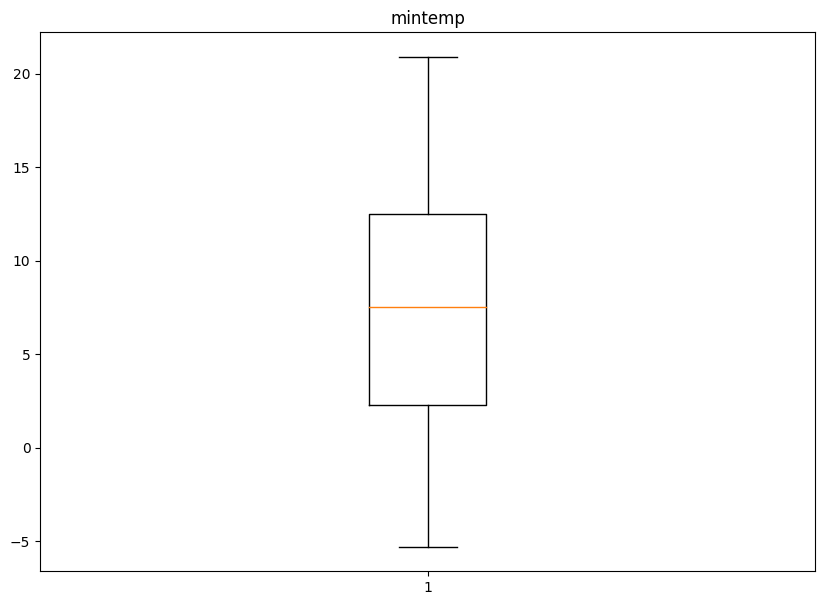

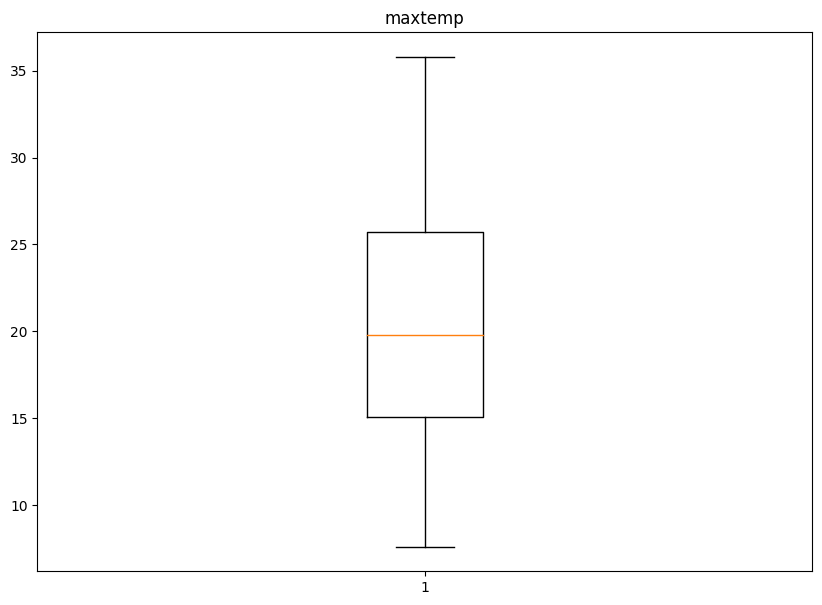

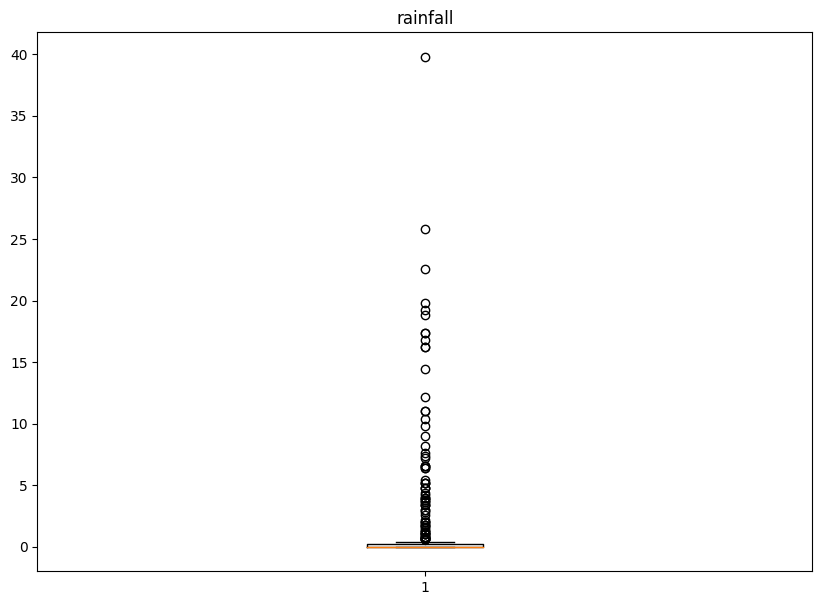

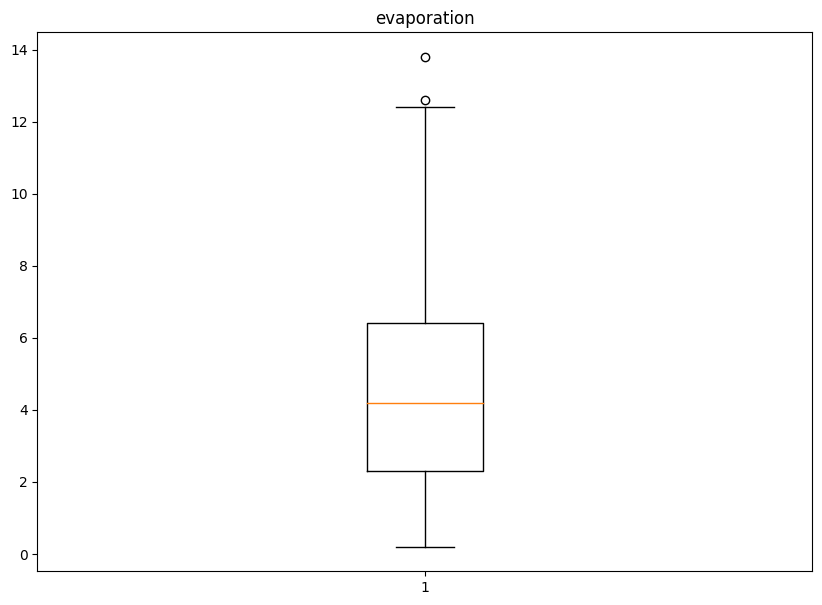

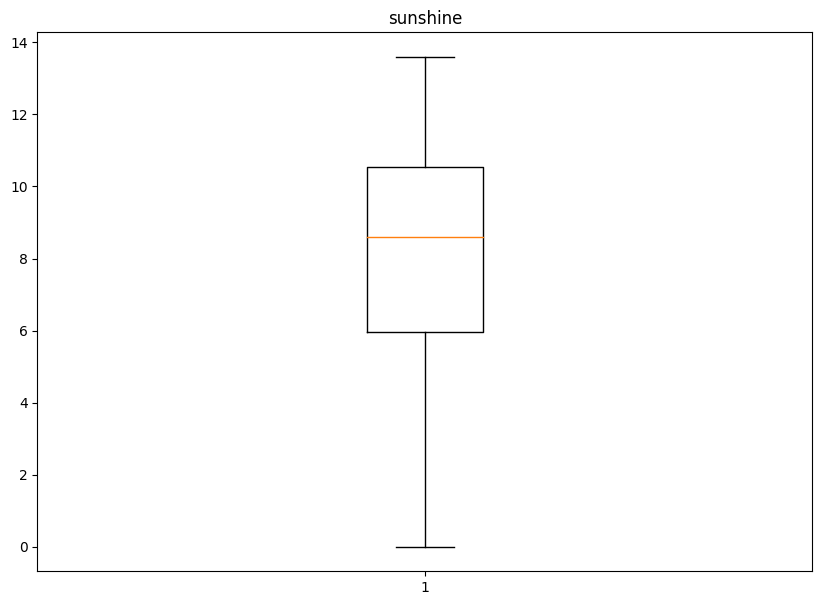

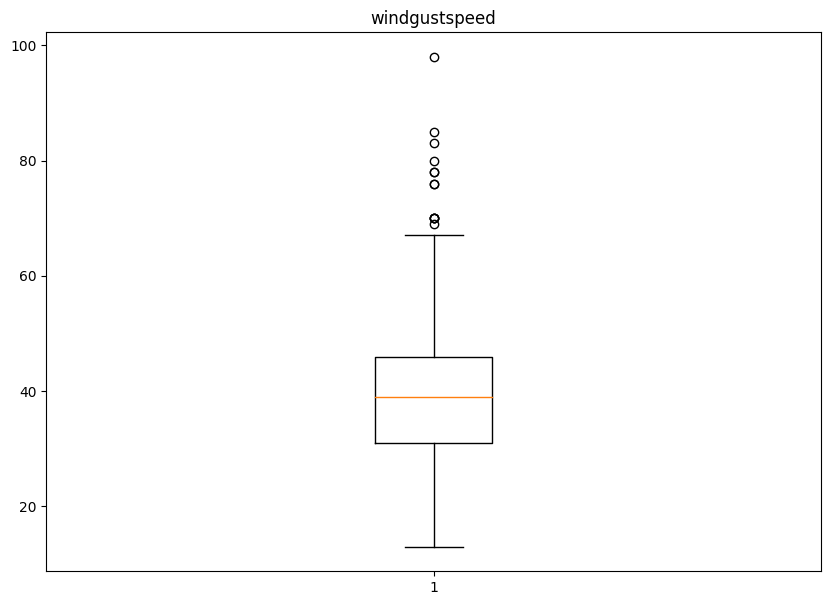

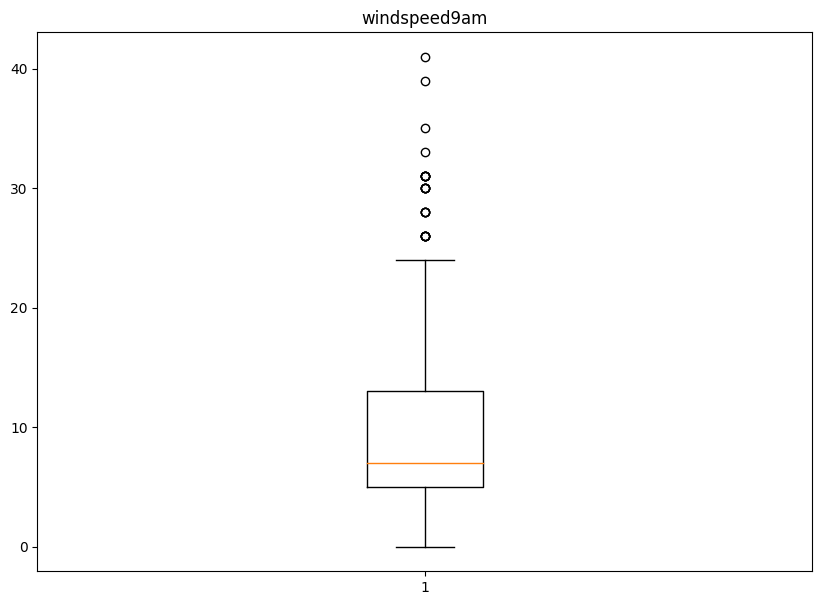

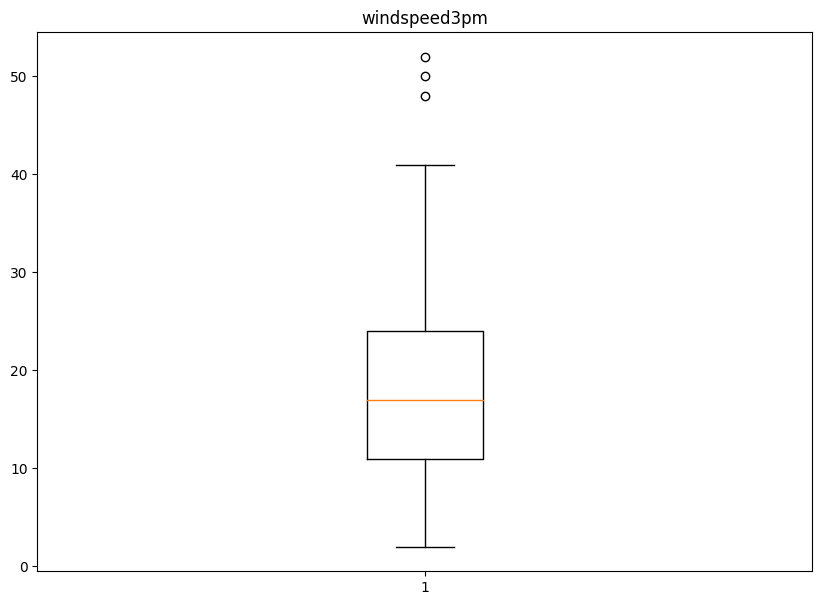

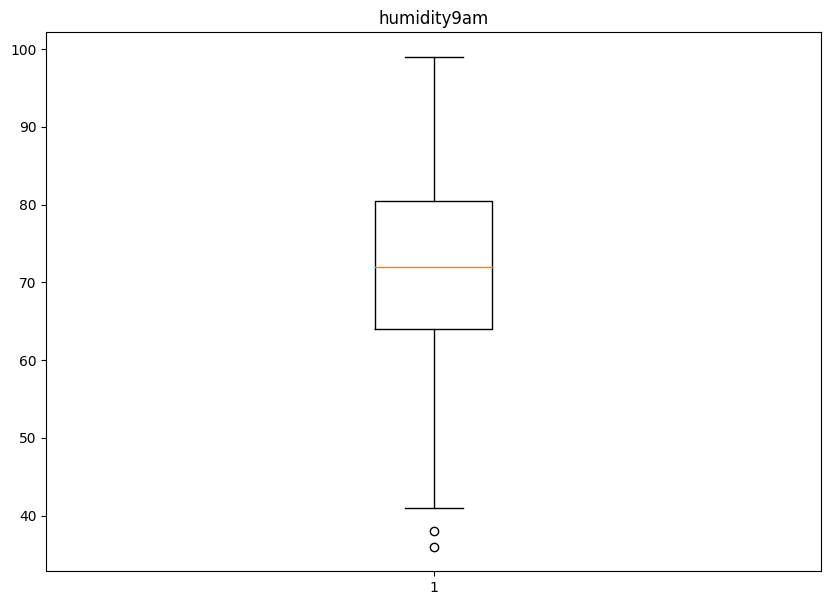

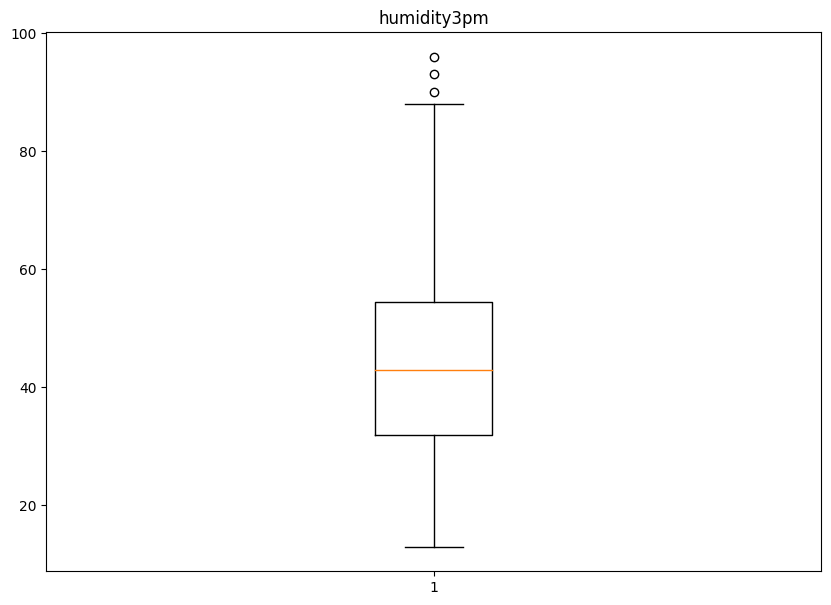

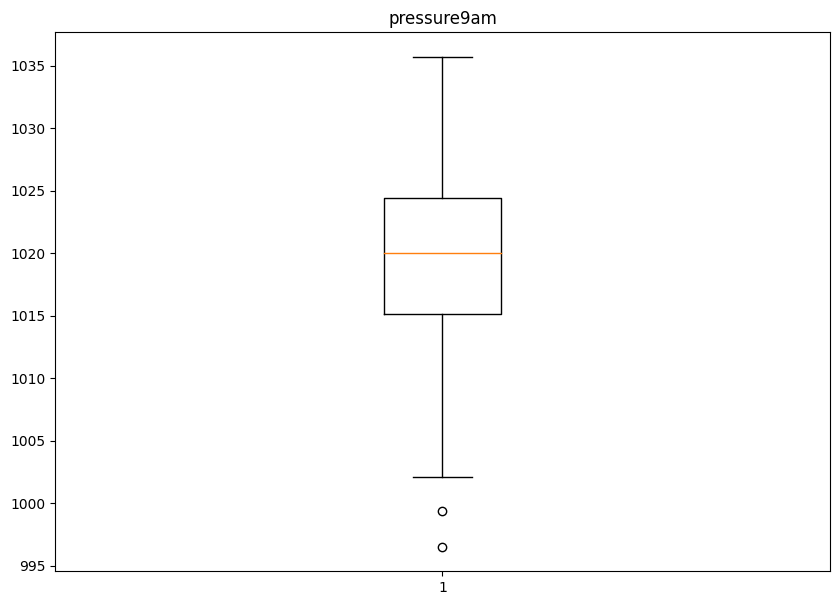

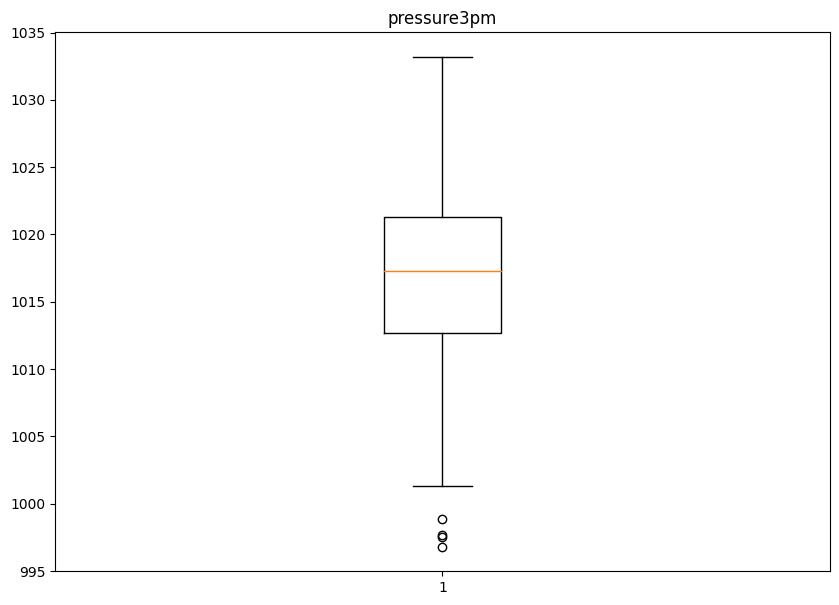

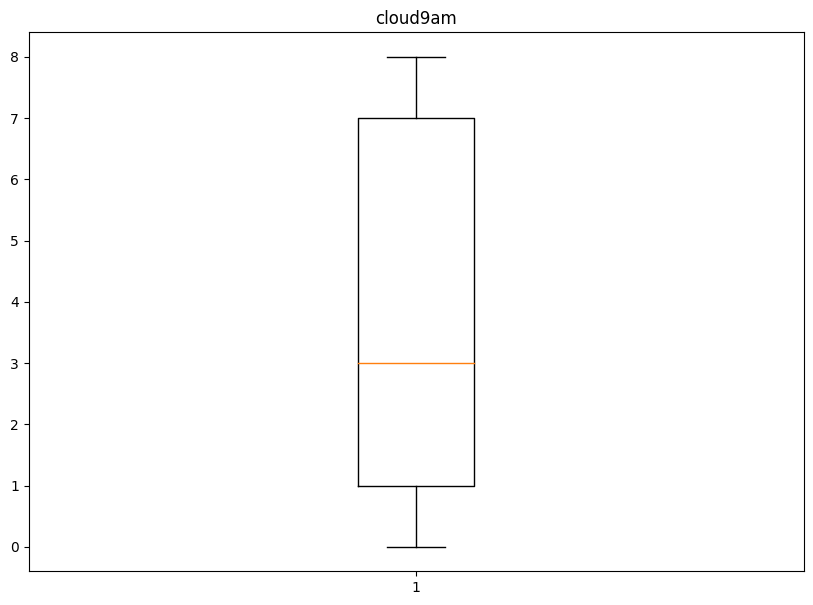

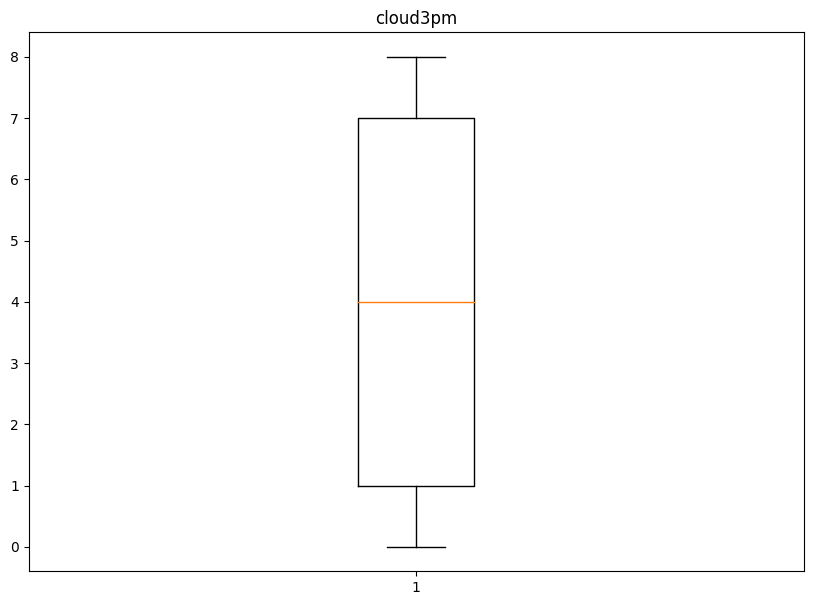

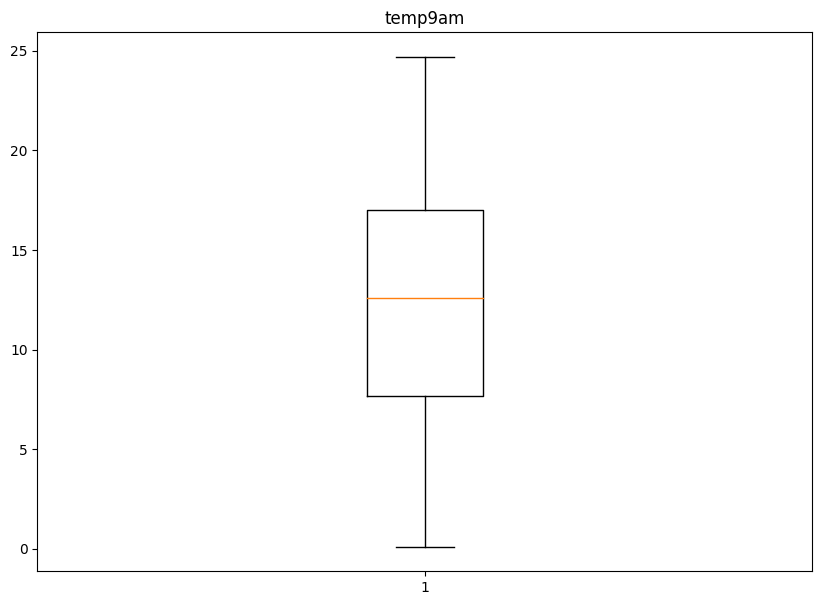

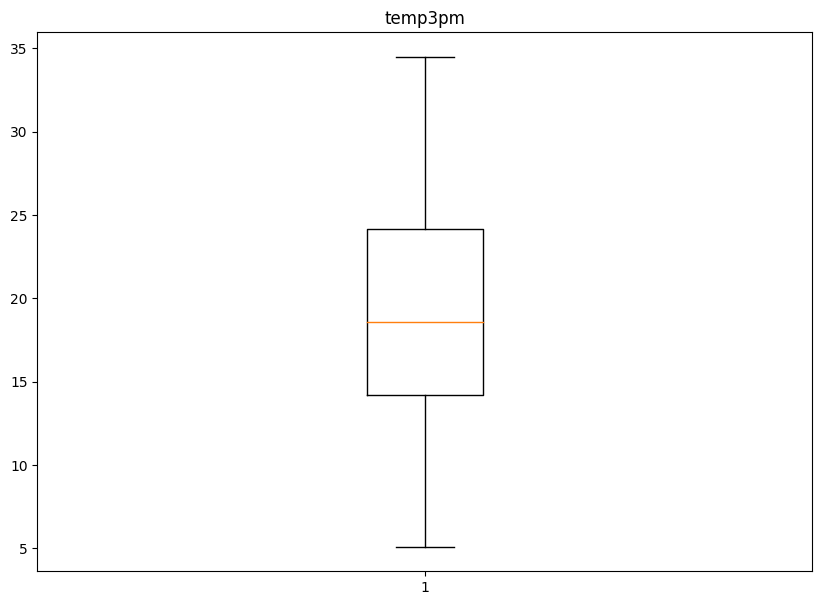

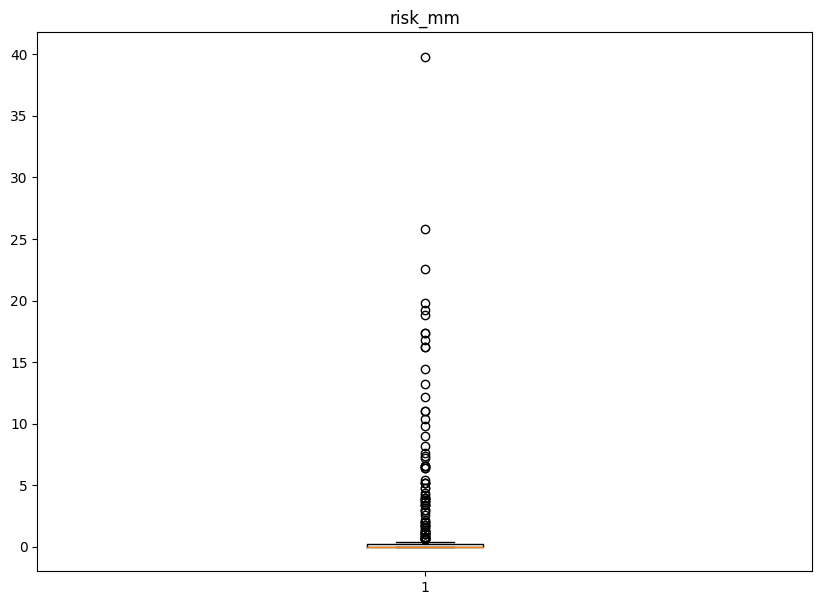

In [50]:
import matplotlib.pyplot as plt
for column in numeric_cols.columns:

  fig = plt.figure(figsize =(10, 7))
  plt.boxplot(data[column])
  plt.title(column)
  plt.show()

In [51]:
Q1 = data['windspeed9am'].quantile(0.25)
Q3 = data['windspeed9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['windspeed9am']=np.where(data['windspeed9am'] > upper , upper , data['windspeed9am'])



<Axes: ylabel='windspeed9am'>

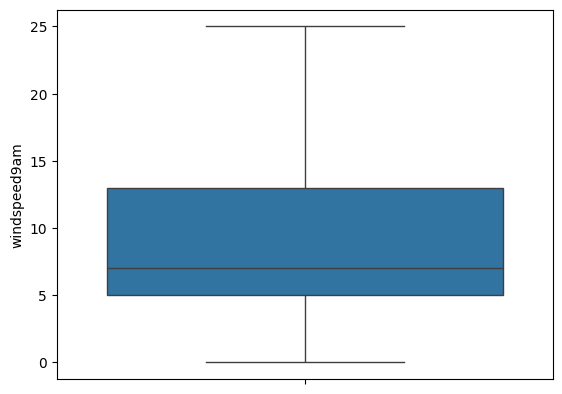

In [52]:
sns.boxplot(data['windspeed9am'])

In [53]:
Q1 = data['windgustspeed'].quantile(0.25)
Q3 = data['windgustspeed'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['windgustspeed']=np.where(data['windgustspeed'] > upper , upper , data['windgustspeed'])

<Axes: ylabel='windgustspeed'>

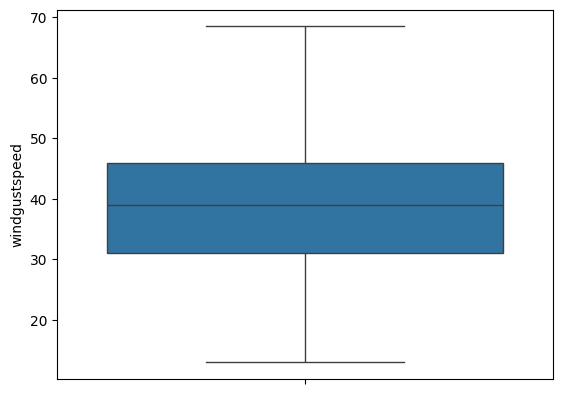

In [54]:
sns.boxplot(data['windgustspeed'])

In [55]:
Q1 = data['windspeed3pm'].quantile(0.25)
Q3 = data['windspeed3pm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['windspeed3pm']=np.where(data['windspeed3pm'] > upper , upper , data['windspeed3pm'])



<Axes: ylabel='windspeed3pm'>

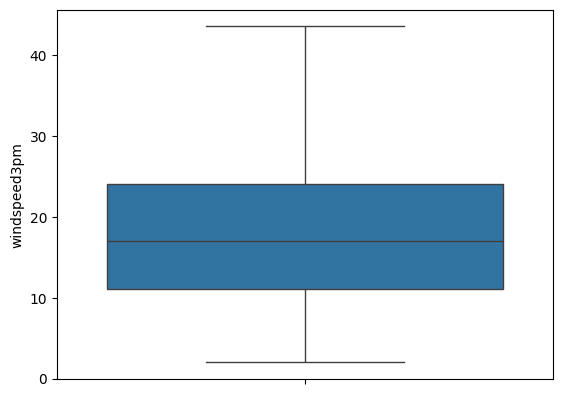

In [56]:
sns.boxplot(data['windspeed3pm'])

In [57]:
Q1 = data['humidity9am'].quantile(0.25)
Q3 = data['humidity9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['humidity9am']=np.where(data['humidity9am'] <lower  , lower , data['humidity9am'])



<Axes: ylabel='humidity9am'>

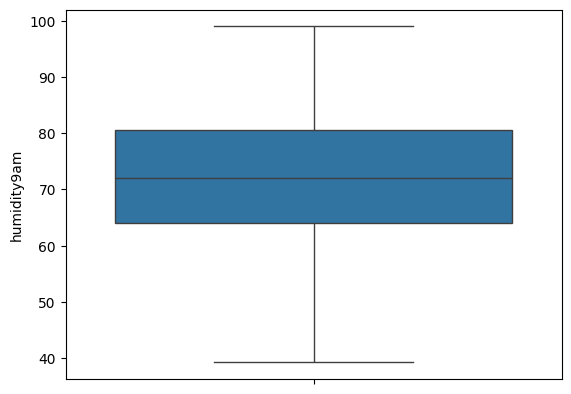

In [58]:
sns.boxplot(data['humidity9am'])

In [59]:
Q1 = data['pressure3pm'].quantile(0.25)
Q3 = data['pressure3pm'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['pressure3pm']=np.where(data['pressure3pm'] <lower , lower , data['pressure3pm'])



<Axes: ylabel='pressure3pm'>

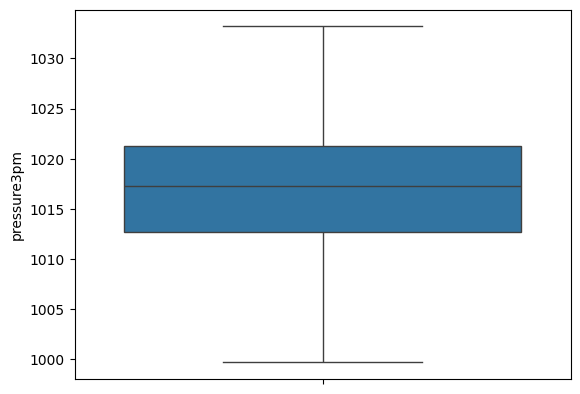

In [60]:
sns.boxplot(data['pressure3pm'])

In [61]:
Q1 = data['pressure9am'].quantile(0.25)
Q3 = data['pressure9am'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['pressure9am']=np.where(data['pressure9am'] <lower , lower , data['pressure9am'])


<Axes: ylabel='pressure9am'>

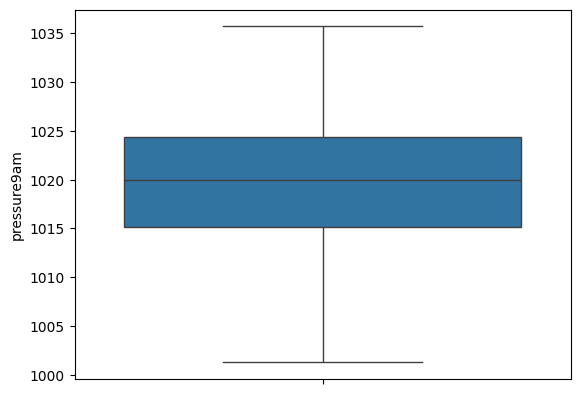

In [62]:
sns.boxplot(data['pressure9am'])

In [63]:
Q1 = data['evaporation'].quantile(0.25)
Q3 = data['evaporation'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data['evaporation']=np.where(data['evaporation'] >upper, upper , data['evaporation'])


<Axes: ylabel='evaporation'>

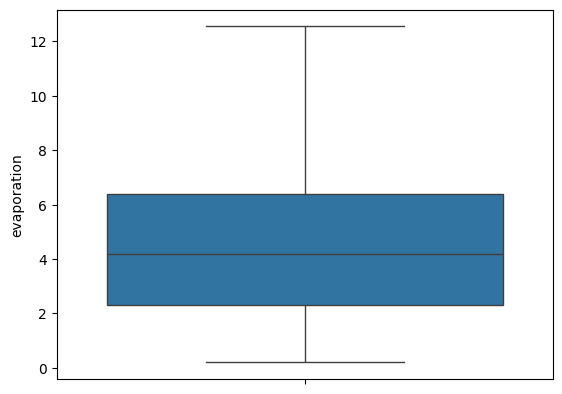

In [64]:
sns.boxplot(data['evaporation'])

In [65]:
numeric_cols=data.select_dtypes(include='number')
cate_cols=data.select_dtypes(include='object')

# converting categorical variables

In [66]:
data['windgustdir'].unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW'], dtype=object)

In [67]:
data['windgustdir']=data['windgustdir'].map({'NW':1, 'ENE':2, 'SSE':3, 'SE':4, 'E':5, 'S':6, 'N':7, 'WNW':8, 'ESE':9, 'NE':10, 'NNE':11,
       'NNW':12, 'SW':13, 'W':14, 'WSW':15, 'SSW':16})

In [68]:
data['windgustdir'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [69]:
data['winddir9am']=data['winddir9am'].map({'SW':1, 'E':2, 'N':3, 'WNW':4, 'SSE':5, 'SE':6, 'S':7, 'WSW':8, 'NNE':9, 'NNW':10,
       'ENE':11, 'SSW':12, 'NW':13, 'ESE':14, 'NE':15, 'W':16,0:0})

In [70]:
data['winddir3pm'].unique()

array(['NW', 'W', 'NNE', 'ESE', 'E', 'ENE', 'WSW', 'NE', 'NNW', 'SE', 'S',
       'SW', 'WNW', 'N', 'SSW', 'SSE'], dtype=object)

In [71]:
data['winddir3pm']=data['winddir3pm'].map({'NW':1, 'ENE':2, 'SSE':3, 'SE':4, 'E':5, 'S':6, 'N':7, 'WNW':8, 'ESE':9, 'NE':10, 'NNE':11,
       'NNW':12, 'SW':13, 'W':14, 'WSW':15, 'SSW':16})

In [72]:
data['winddir3pm'].unique()

array([ 1, 14, 11,  9,  5,  2, 15, 10, 12,  4,  6, 13,  8,  7, 16,  3])

In [73]:
data['raintoday'].unique()

array(['No', 'Yes'], dtype=object)

In [74]:
data['raintoday']=data['raintoday'].map({'No':0, 'Yes':1})
data['raintoday'].unique()

array([0, 1])

In [75]:
data['raintomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
data['raintomorrow']=data['raintomorrow'].map({'No':0, 'Yes':1})
data['raintomorrow'].unique()

array([1, 0])

In [77]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

# raw model_1

In [78]:
data.shape

(359, 22)

In [79]:
data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

In [80]:
all_num=data[numeric_cols.columns]

In [81]:
all_num.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
risk_mm          0
dtype: int64

In [82]:
all_num.shape

(359, 17)

In [83]:
all_object=data[cate_cols.columns]
cate_cols.shape

(359, 5)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
normalized_data_all=scaler.fit_transform(all_num)

In [85]:

norm_data_all=pd.DataFrame(data=normalized_data_all,columns=all_num.columns)
norm_data_all.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,risk_mm
0,0.114491,0.547106,-0.333511,-0.434008,-0.469126,-0.792973,-0.445889,0.232347,-0.302291,-0.917620,0.015459,-0.268898,1.060061,1.113816,0.352655,0.644668,0.512385
1,1.110913,0.934592,0.522726,-0.057749,0.510540,-0.053231,-0.727958,-0.113047,0.613832,-0.498199,-1.092954,-1.304540,0.382301,-0.392248,0.901258,0.960017,0.512385
2,1.061092,0.412976,0.522726,0.469014,-1.333537,2.371479,-0.445889,-1.379492,0.766519,1.479075,-1.533283,-1.492838,1.398940,1.113816,0.529624,0.134104,9.036268
3,0.994664,-0.764387,9.132671,0.995777,0.337658,1.179672,2.233765,0.692873,-0.760352,0.700149,-2.140633,-1.524221,-0.634337,1.113816,0.193384,-0.781909,0.324012
4,0.048063,-0.674967,0.332451,0.393762,0.769864,0.850898,1.528593,1.153399,-0.302291,0.280727,-0.197114,0.280306,1.060061,1.113816,-0.231341,-0.586693,-0.335294


In [86]:
norm_data_all.isnull().sum()
norm_data_all.shape

(359, 17)

In [87]:
norm_data=pd.concat([norm_data_all,all_object],axis=1 ,join='inner')

In [88]:
norm_data.shape

(359, 22)

In [89]:
norm_data.isnull().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
risk_mm          0
windgustdir      0
winddir9am       0
winddir3pm       0
raintoday        0
raintomorrow     0
dtype: int64

In [90]:
norm_data.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm', 'risk_mm', 'windgustdir', 'winddir9am',
       'winddir3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [91]:
x_raw=norm_data.drop(['raintomorrow'],axis=1)
y_raw=norm_data['raintomorrow']
from sklearn.model_selection import train_test_split
x_train_raw,x_test_raw,y_train_raw,y_test_raw=train_test_split(x_raw,y_raw,test_size=0.2,random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_raw,y_train_raw)
from sklearn.metrics import f1_score,confusion_matrix,classification_report
y_pred_raw=model.predict(x_test_raw)
print(f1_score(y_test_raw,y_pred_raw))
print(accuracy_score(y_test_raw,y_pred_raw))


0.923076923076923
0.9722222222222222


# feature selection

<Axes: >

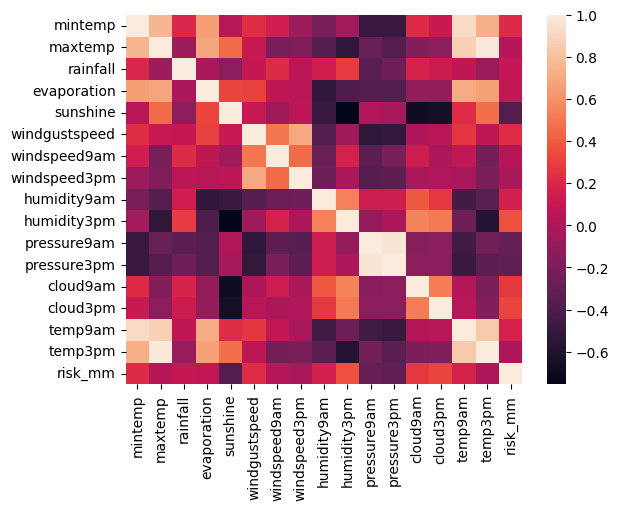

In [93]:
corr=numeric_cols.corr()
sns.heatmap(corr)

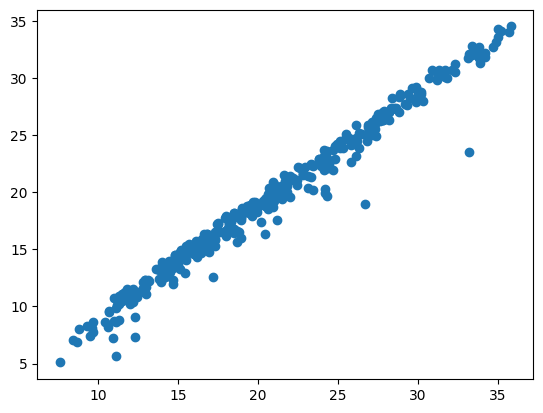

In [94]:
plt.scatter(data['maxtemp'],data['temp3pm'])

In [95]:
data['maxtemp'].corr(data['raintomorrow'])

0.05677609013685437

In [96]:
data['raintomorrow'].corr(data['temp3pm'])

0.019512546966220887

In [97]:
norm_data = norm_data.drop(['temp3pm'],axis=1)

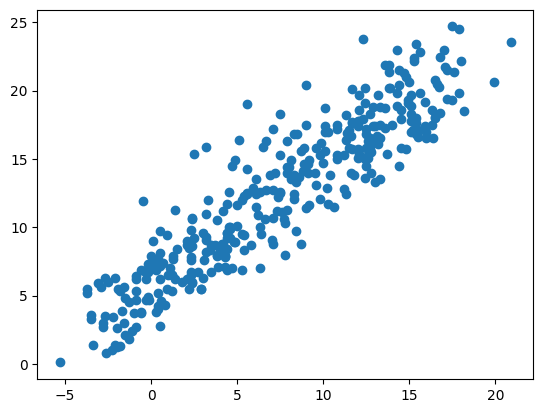

In [98]:
plt.scatter(data['mintemp'],data['temp9am'])

In [99]:
data['mintemp'].corr(data['raintomorrow'])

0.23341233130639014

In [100]:
data['raintomorrow'].corr(data['temp9am'])

0.18460860166721804

In [101]:
data['temp9am'].var()

32.01983567015763

In [102]:
data['mintemp'].var()

36.360334573069196

In [103]:
norm_data=norm_data.drop(['temp9am'],axis=1)

In [104]:
(data['maxtemp']).corr(data['mintemp'])

0.7549919717665492

In [105]:
norm_data=norm_data.drop(['maxtemp'],axis=1)

# scaling numeric columns

In [106]:
norm_data.describe()

,mintemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,risk_mm,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
count,359.000000,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.000000,-4.948069e-17,2.375073e-16,9.896138e-17,-2.968842e-17,7.916911e-17,1.187537e-16,3.364687e-16,-8.906525e-17,-4.868900e-15,2.863942e-14,-8.411718e-17,-7.916911e-17,-2.968842e-17,6.529248,7.225627,7.688022,0.178273,0.178273
std,1.001396,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00,4.332366,4.543620,4.388615,0.383277,0.383277
min,-2.094243,-3.335113e-01,-1.638038e+00,-2.284389e+00,-2.190264e+00,-1.292095e+00,-1.840018e+00,-2.497169e+00,-1.876299e+00,-2.782146e+00,-2.673626e+00,-1.312096e+00,-1.521796e+00,-3.352936e-01,1.000000,0.000000,1.000000,0.000000,0.000000
25%,-0.832109,-3.335113e-01,-8.478937e-01,-5.699736e-01,-7.107797e-01,-5.869232e-01,-8.038352e-01,-6.076652e-01,-7.378683e-01,-6.754016e-01,-6.376491e-01,-9.732168e-01,-1.145280e+00,-3.352936e-01,2.000000,4.000000,4.000000,0.000000,0.000000
50%,0.031456,-3.335113e-01,-1.330009e-01,1.935896e-01,-5.323120e-02,-3.048543e-01,-1.130468e-01,3.083516e-03,-7.877717e-02,6.100988e-02,9.200749e-02,-2.954577e-01,-1.573186e-02,-3.352936e-01,6.000000,6.000000,8.000000,0.000000,0.000000
75%,0.861807,-2.859425e-01,6.947697e-01,7.554568e-01,5.221237e-01,5.413522e-01,6.928729e-01,6.520041e-01,6.102727e-01,7.290945e-01,7.196691e-01,1.060061e+00,1.113816e+00,-2.882003e-01,10.000000,11.000000,12.000000,0.000000,0.000000
max,2.256797,9.132671e+00,3.008765e+00,1.634275e+00,2.371479e+00,2.233765e+00,2.937935e+00,2.064361e+00,3.096844e+00,2.444857e+00,2.586962e+00,1.398940e+00,1.490332e+00,9.036268e+00,16.000000,16.000000,16.000000,1.000000,1.000000


In [107]:
norm_data.shape

(359, 19)

# splitting data

In [108]:
x=norm_data.drop(['raintomorrow'],axis=1)
y=norm_data['raintomorrow']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# test logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression
Lr_log=LogisticRegression()
Lr_log.fit(x_train,y_train)
y_pred=Lr_log.predict(x_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.923076923076923
0.9722222222222222


# feature selection based on model

In [110]:
coeff=pd.DataFrame(Lr_log.coef_,columns=Lr_log.feature_names_in_)
coeff

,mintemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,risk_mm,windgustdir,winddir9am,winddir3pm,raintoday
0,-0.340686,-0.395921,0.352155,-0.468191,0.284559,0.042561,-0.20759,0.272255,0.114562,0.071924,-0.980961,0.037172,0.268746,4.57841,0.051067,-0.018939,0.025922,-0.111829


In [111]:
test_data=norm_data.drop(['winddir3pm', 'winddir9am' ,'windgustdir' , 'cloud9am' , 'windspeed9am' ],axis=1)

x_dum=test_data.drop(['raintomorrow'],axis=1)
y_dum=test_data['raintomorrow']
x_train_dum,x_test_dum,y_train_dum,y_test_dum=train_test_split(x_dum,y_dum,test_size=0.2,random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression
Lr_test=LogisticRegression()
Lr_test.fit(x_train_dum,y_train_dum)
y_pred_dum=Lr_test.predict(x_test_dum)
print(f1_score(y_test_dum,y_pred_dum))
print(accuracy_score(y_test_dum,y_pred_dum))

0.923076923076923
0.9722222222222222


In [113]:
test_data['diff_hum']=test_data['humidity3pm']-test_data['humidity9am']
data['diff_hum']=data['humidity3pm']-data['humidity9am']
test_data.shape

(359, 15)

In [114]:
test_data['press_diff']=test_data['pressure3pm']-test_data['pressure9am']
data['press_diff']=data['pressure3pm']-data['pressure9am']
test_data.shape

(359, 16)

In [115]:
test_data=test_data.drop(['humidity3pm','humidity9am','pressure9am','pressure3pm'] , axis=1)

In [116]:
test_data.shape

(359, 12)

In [117]:
data.shape

(359, 24)

In [118]:
test_data.columns

Index(['mintemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed',
       'windspeed3pm', 'cloud3pm', 'risk_mm', 'raintoday', 'raintomorrow',
       'diff_hum', 'press_diff'],
      dtype='object')

<Axes: >

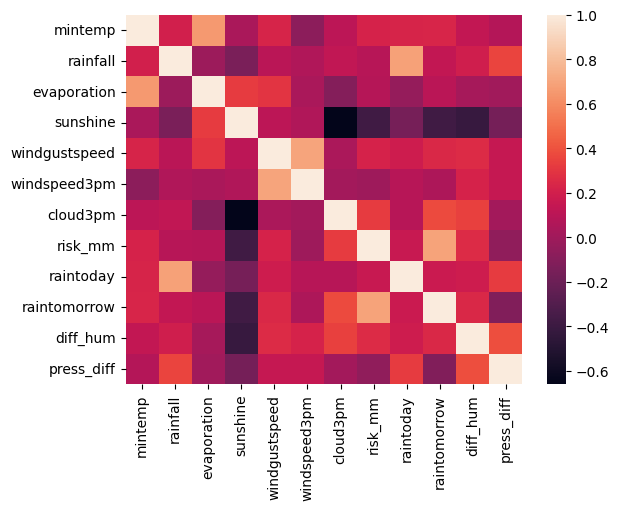

In [119]:
data[test_data.columns].corr()
sns.heatmap(data[test_data.columns].corr())

In [120]:
data['evaporation'].corr(data['raintomorrow'])

0.09947587141747014

In [121]:
data['raintomorrow'].corr(data['mintemp'])

0.23341233130639014

In [122]:
data['evaporation'].corr(data['mintemp'])

0.6517334079103121

In [123]:
data['evaporation'].var()

7.08331884813495

In [124]:
data['mintemp'].var()

36.360334573069196

In [125]:
test_data=test_data.drop(['evaporation'],axis=1)

In [126]:
data['sunshine'].corr(data['raintomorrow'])

-0.3803966534481581

In [127]:
data['sunshine'].var()

12.078507959726739

In [128]:
data['rainfall'].corr(data['raintoday'])

0.6866039891597795

In [129]:
data['rainfall'].corr(data['raintomorrow'])

0.1344229818383809

In [130]:
data['raintoday'].corr(data['raintomorrow'])

0.16334745762711927

In [131]:
data['rainfall'].var()

17.726698930922336

In [132]:
data['raintoday'].var()

0.14690091968690186

In [133]:
test_data=test_data.drop(['raintoday'], axis=1)

In [134]:
data[test_data.columns].var()

mintemp           36.360335
rainfall          17.726699
sunshine          12.078508
windgustspeed    148.434848
windspeed3pm      75.652604
cloud3pm           7.073668
risk_mm           18.086464
raintomorrow       0.146901
diff_hum         215.172746
press_diff         2.801174
dtype: float64

In [135]:
test_data=test_data.drop(['press_diff'],axis=1)

In [136]:
data['cloud3pm'].corr(data['raintomorrow'])

0.3763005391540748

In [137]:
test_data=test_data.drop(['cloud3pm'],axis=1)

# test-logistic regression -2

In [138]:
x=test_data.drop(['raintomorrow'],axis=1)
y=test_data['raintomorrow']

In [139]:
test_data.columns


Index(['mintemp', 'rainfall', 'sunshine', 'windgustspeed', 'windspeed3pm',
       'risk_mm', 'raintomorrow', 'diff_hum'],
      dtype='object')

predicting unkown external data

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
Lr_test_2=LogisticRegression()
Lr_test_2.fit(x_train,y_train)
y_pred=Lr_test_2.predict(x_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8333333333333333
0.9444444444444444


In [144]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.645320197044335


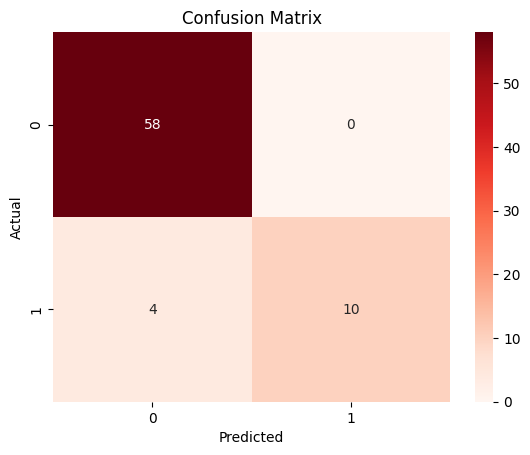

In [145]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [201]:
a=[13.4,30.4,0.0,3.2,6.7,'N',30.0,'SSE','ESE',17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,2.0,20.4,28.8,'No',2.2,'Yes']
b=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RISK_MM','RainTomorrow']

In [202]:
len(a)

22

In [203]:
len(b)

22

In [204]:
res = {b[i]: a[i] for i in range(len(a))}
res=pd.DataFrame(res,index=[0])
res

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,30.4,0.0,3.2,6.7,N,30.0,SSE,ESE,17.0,...,22.0,1011.8,1008.7,7.0,2.0,20.4,28.8,No,2.2,Yes


In [205]:
res.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [206]:
test_data.columns

Index(['mintemp', 'rainfall', 'sunshine', 'windgustspeed', 'windspeed3pm',
       'risk_mm', 'raintomorrow', 'diff_hum'],
      dtype='object')

In [207]:
res.columns=res.columns.str.lower()

In [208]:
res['diff_hum']=res['humidity3pm']-res['humidity9am']
res=res[test_data.columns]

In [209]:
res.columns

Index(['mintemp', 'rainfall', 'sunshine', 'windgustspeed', 'windspeed3pm',
       'risk_mm', 'raintomorrow', 'diff_hum'],
      dtype='object')

In [210]:
res.head()

,mintemp,rainfall,sunshine,windgustspeed,windspeed3pm,risk_mm,raintomorrow,diff_hum
0,13.4,0.0,6.7,30.0,6.0,2.2,Yes,-26.0


In [211]:
x_res=res.drop(['raintomorrow'],axis=1)
y_res=res['raintomorrow']

In [214]:
y_pred_res=Lr_test_2.predict(x_res)

In [143]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

# test-KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print(f1_score(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))


0.6666666666666666
0.9027777777777778
0.3793103448275863


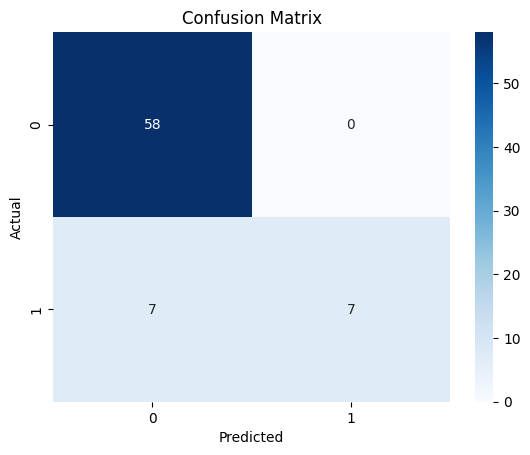

In [147]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()